# Mortgage Comparisons

We can now run some simulations using the fixed and variable calculators to probe the following questions:

1. fixed vs variable mortgage cumulative costs
2. the amount saved with a higher downpayment
3. the effect of negotiating a lower spread interest


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import paymentFunctions as pay

## Load variable rates

In [9]:
variable_rates = pd.read_excel('euribor-rates/euribor_variable.xlsx')


## Simulations

In [10]:
sim1 = pay.amortize_variable(variable_rates, "6-month", 0.9, 24, 152500, 0, "sim1")
sim2 = pay.amortize_variable(variable_rates, "6-month", 0.9, 24, 172500, 0, "sim2")
sim3 = pay.amortize_variable(variable_rates, "6-month", 0.8, 24, 152500, 0, "sim3")
sim4 = pay.amortize_variable(variable_rates, "6-month", 0.8, 24, 172500, 0, "sim4")
sim5 = pay.amortize_fixed(3.85, 24, 172500, 0, "sim5")
sim6 = pay.amortize_fixed(3.85, 24, 152000, 0, "sim6")

In [11]:
simulations = pd.concat([sim1, sim2, sim3, sim4, sim5, sim6]).reset_index(drop=True)
simulations

,payment_num,euribor,spread,rate,payments remaining,starting balance,payment,interest,principle,end balance,cumlative_payment,cumlative_principle,cumlative_interest,balance,type,simulation
0,1,4.84,0.9,5.74,288.0,152500.00,976.25,729.06,247.19,152252.81,976.25,247.19,729.06,152252.81,variable spread: 0.9%,sim1
1,2,4.84,0.9,5.74,287.0,152252.81,976.53,728.28,248.26,152004.55,1952.78,495.45,1457.34,152004.55,variable spread: 0.9%,sim1
2,3,4.84,0.9,5.74,286.0,152004.55,976.53,727.09,249.44,151755.11,2929.32,744.89,2184.42,151755.11,variable spread: 0.9%,sim1
3,4,4.84,0.9,5.74,285.0,151755.11,976.53,725.90,250.64,151504.47,3905.85,995.53,2910.32,151504.47,variable spread: 0.9%,sim1
4,5,4.84,0.9,5.74,284.0,151504.47,976.53,724.70,251.84,151252.63,4882.38,1247.37,3635.02,151252.63,variable spread: 0.9%,sim1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,284,NaN,NaN,3.85,NaN,NaN,809.43,12.86,796.57,NaN,229877.07,148788.10,81088.97,3211.90,fixed,sim6
1724,285,NaN,NaN,3.85,NaN,NaN,809.43,10.30,799.12,NaN,230686.50,149587.22,81099.28,2412.78,fixed,sim6
1725,286,NaN,NaN,3.85,NaN,NaN,809.43,7.74,801.69,NaN,231495.93,150388.90,81107.02,1611.10,fixed,sim6
1726,287,NaN,NaN,3.85,NaN,NaN,809.43,5.17,804.26,NaN,232305.35,151193.16,81112.19,806.84,fixed,sim6


## Plotting comparisons


### Fixed vs variable

In [12]:
simulations_interest = simulations.pivot_table(index="payment_num",
                                              columns="simulation",
                                              values="cumlative_interest")
simulations_interest.tail(3)

simulation,sim1,sim2,sim3,sim4,sim5,sim6
payment_num,,,,,,
286,63940.40,72326.02,61723.41,69818.28,92045.80,81107.02
287,63945.92,72332.27,61728.76,69824.34,92051.66,81112.19
288,63948.69,72335.40,61731.44,69827.37,92054.60,81114.78


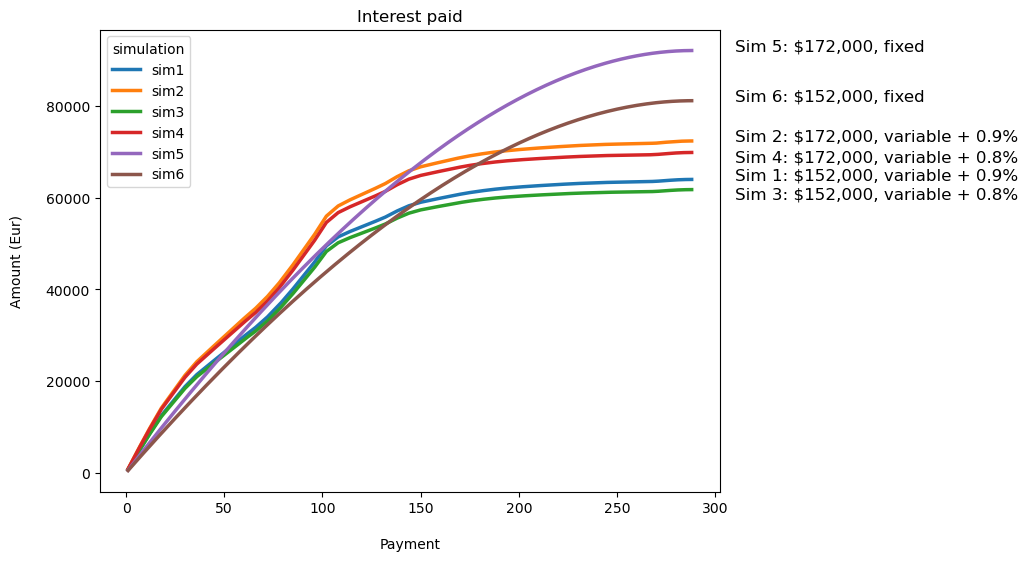

In [13]:
plt.style.use("default")

fig1 = simulations_interest.plot(figsize = (8,6),
                                 linewidth=2.5,
                                 xlabel = "\nPayment",
                                 ylabel = "Amount (Eur)\n",
                                 title = "Interest paid",
                                 legend = True);

fig1.text(x = 310, y = simulations_interest["sim1"].max(), s = 'Sim 1: $152,000, variable + 0.9%', fontsize = 12)
fig1.text(x = 310, y = simulations_interest["sim2"].max(), s = 'Sim 2: $172,000, variable + 0.9%', fontsize = 12)
fig1.text(x = 310, y = simulations_interest["sim3"].max() - 2000, s = 'Sim 3: $152,000, variable + 0.8%', fontsize = 12)
fig1.text(x = 310, y = simulations_interest["sim4"].max() - 2000, s = 'Sim 4: $172,000, variable + 0.8%', fontsize = 12)
fig1.text(x = 310, y = simulations_interest["sim5"].max(), s = 'Sim 5: $172,000, fixed', fontsize = 12)
fig1.text(x = 310, y = simulations_interest["sim6"].max(), s = 'Sim 6: $152,000, fixed', fontsize = 12);


### Spread contribution


In [14]:
simulations_interest_spread = simulations_interest[['sim1', 'sim2','sim3', 'sim4']]

Text(310, 68827.37, 'Sim 4: $172,000, variable + 0.8%')

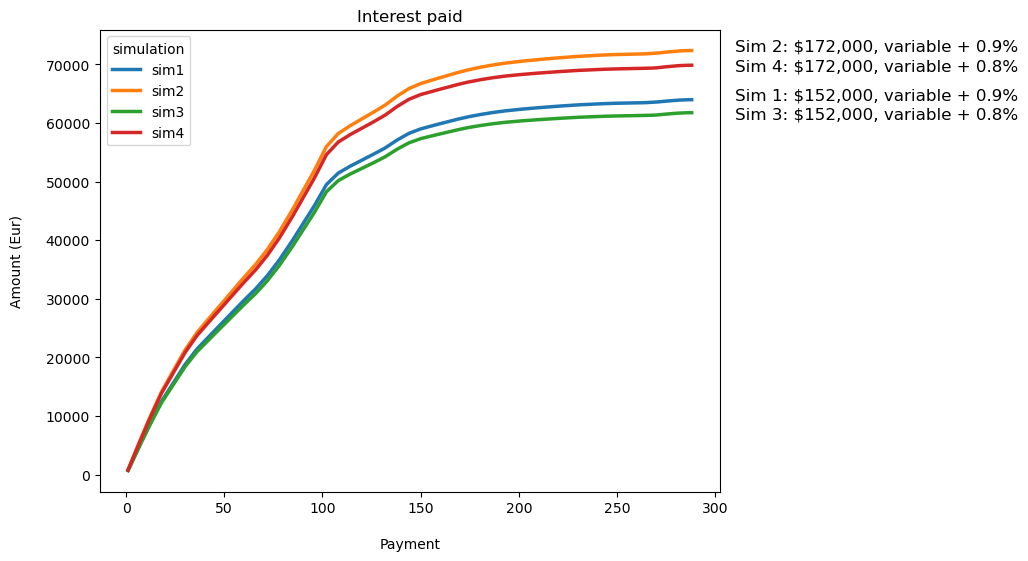

In [15]:
plt.style.use("default")

fig2 =simulations_interest_spread.plot(figsize = (8,6),
                                 linewidth=2.5,
                                 xlabel = "\nPayment",
                                 ylabel = "Amount (Eur)\n",
                                 title = "Interest paid",
                                 legend = True);

fig2.text(x = 310, y = simulations_interest_spread["sim1"].max(), s = 'Sim 1: $152,000, variable + 0.9%', fontsize = 12)
fig2.text(x = 310, y = simulations_interest_spread["sim2"].max(), s = 'Sim 2: $172,000, variable + 0.9%', fontsize = 12)
fig2.text(x = 310, y = simulations_interest_spread["sim3"].max() - 1000, s = 'Sim 3: $152,000, variable + 0.8%', fontsize = 12)
fig2.text(x = 310, y = simulations_interest_spread["sim4"].max() - 1000, s = 'Sim 4: $172,000, variable + 0.8%', fontsize = 12)

In [16]:
spread_savings24 = round((simulations_interest['sim2'].max() - simulations_interest['sim4'].max()),2)
spread_savings13 = round((simulations_interest['sim1'].max() - simulations_interest['sim3'].max()),2)

print(f'${spread_savings24} difference between simulation 2 and 4')
print(f'${spread_savings13} difference between simulation 1 and 3')

$2508.03 difference between simulation 2 and 4
$2217.25 difference between simulation 1 and 3


### Higher deposit

In [19]:
simulations_interest_deposit = simulations_interest[['sim2', 'sim3','sim5', 'sim6']]

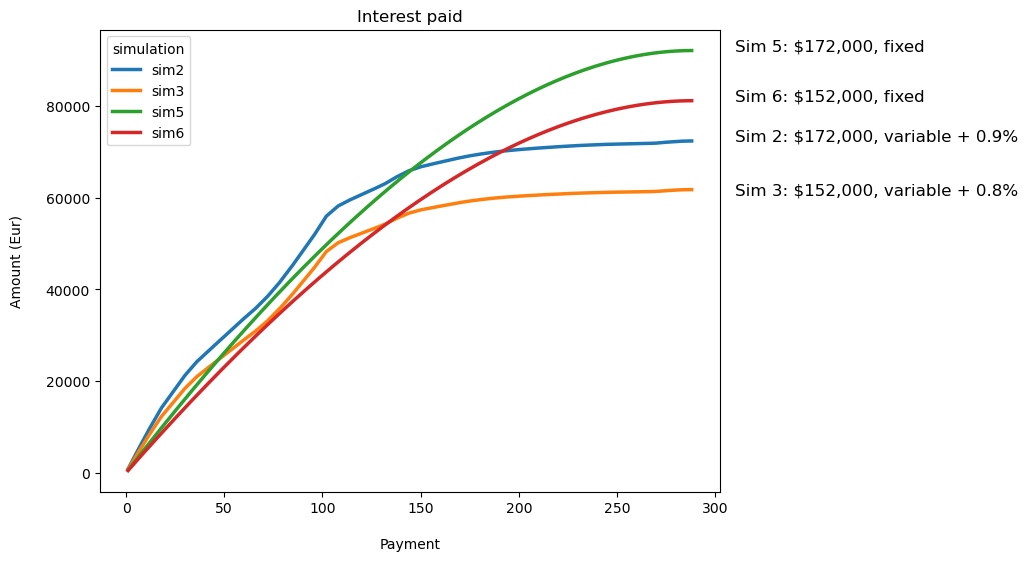

In [20]:
plt.style.use("default")

fig3 = simulations_interest_deposit.plot(figsize = (8,6),
                                 linewidth=2.5,
                                 xlabel = "\nPayment",
                                 ylabel = "Amount (Eur)\n",
                                 title = "Interest paid",
                                 legend = True);

fig3.text(x = 310, y = simulations_interest_deposit["sim2"].max(), s = 'Sim 2: $172,000, variable + 0.9%', fontsize = 12)
fig3.text(x = 310, y = simulations_interest_deposit["sim3"].max() - 1000, s = 'Sim 3: $152,000, variable + 0.8%', fontsize = 12)
fig3.text(x = 310, y = simulations_interest_deposit["sim5"].max(), s = 'Sim 5: $172,000, fixed', fontsize = 12)
fig3.text(x = 310, y = simulations_interest_deposit["sim6"].max(), s = 'Sim 6: $152,000, fixed', fontsize = 12);

In [26]:
deposit_savings23 = round((simulations_interest['sim2'].max() - simulations_interest['sim3'].max()),2)
deposit_savings56 = round((simulations_interest['sim5'].max() - simulations_interest['sim6'].max()),2)

print(f'${deposit_savings23} difference between simulation 2 and 3')
print(f'${deposit_savings56} difference between simulation 5 and 6')

$10603.96 difference between simulation 2 and 3
$10939.82 difference between simulation 5 and 6


## Simulation Summary

### Summary function

An additional function was created to summarize the amortization tables

In [27]:
def mortgage_summary(amortization):
    df = amortization

    summary = {"Simulation": [df["simulation"].max()],
               "payments": [df["payment_num"].max()],
               "Years": [int(df.index.value_counts().sum()/12)],
               "Median interest rate": [df["rate"].median()],
               "Average payment": [df["payment"].mean()],
               "Min payment": [df["payment"].min()],
               "Max payment": [df["payment"].max()],
               "Principal": [df["cumlative_principle"].max()],
               "Interest": [df["cumlative_interest"].max()],
               "Payments": [df["cumlative_payment"].max()],
               "Type": [df["type"].max()]
              }
    if summary["Type"] == "variable":
        print("woo")
    else:
        None
    
    summary = pd.DataFrame(summary)
    summary= summary.round(2)

    return summary

In [28]:
summary_comparison = pd.concat([mortgage_summary(sim1), 
                                mortgage_summary(sim2), 
                                mortgage_summary(sim3), 
                                mortgage_summary(sim4), 
                                mortgage_summary(sim5), 
                                mortgage_summary(sim6)]).reset_index(drop=True)

### Summary table

In [29]:
summary_comparison = summary_comparison.sort_values(by=['Interest']).reset_index()
summary_comparison

,index,Simulation,payments,Years,Median interest rate,Average payment,Min payment,Max payment,Principal,Interest,Payments,Type
0,2,sim3,288,24,2.03,743.86,665.45,967.44,152500.0,61731.44,214231.44,variable spread: 0.8%
1,0,sim1,288,24,2.13,751.56,672.52,976.53,152500.0,63948.69,216448.69,variable spread: 0.9%
2,3,sim4,288,24,2.03,841.41,752.72,1094.32,172500.0,69827.37,242327.37,variable spread: 0.8%
3,1,sim2,288,24,2.13,850.12,760.72,1104.60,172500.0,72335.40,244835.40,variable spread: 0.9%
4,5,sim6,288,24,3.85,809.43,809.43,809.43,152000.0,81114.78,233114.78,fixed
5,4,sim5,288,24,3.85,918.59,918.59,918.59,172500.0,92054.60,264554.60,fixed


In [30]:
mortgage_summary(sim3)

,Simulation,payments,Years,Median interest rate,Average payment,Min payment,Max payment,Principal,Interest,Payments,Type
0,sim3,288,24,2.03,743.86,665.45,967.44,152500.0,61731.44,214231.44,variable spread: 0.8%


In [32]:
fix1 = pay.amortize_fixed(2.85, 30, 175000, 0, name="30 year fixed")
fix1.tail()

,payment_num,rate,payment,principle,interest,balance,cumlative_payment,cumlative_interest,cumlative_principle,type,simulation
356,356,2.85,723.73,715.19,8.53,2877.79,257646.25,85524.05,172122.21,fixed,30 year fixed
357,357,2.85,723.73,716.89,6.83,2160.90,258369.98,85530.88,172839.10,fixed,30 year fixed
358,358,2.85,723.73,718.59,5.13,1442.31,259093.70,85536.01,173557.69,fixed,30 year fixed
359,359,2.85,723.73,720.30,3.43,722.01,259817.43,85539.44,174277.99,fixed,30 year fixed
360,360,2.85,723.73,722.01,1.71,0.00,260541.15,85541.15,175000.00,fixed,30 year fixed


# Single simulation plot

In [33]:
def mortgage_plot(amoritization):
    data = amoritization
    
    plt.style.use("default")
    plt.plot(data['payment_num'], data['cumlative_payment'], color='#83E28E',label = "payments", linewidth=2.5)
    plt.plot(data['payment_num'], data['cumlative_interest'], color='salmon',label = "interest", linewidth=2.5)
    plt.plot(data['payment_num'], data['cumlative_principle'],color='#A6C9EC',label = "principle", linewidth=2.5)
    plt.legend()
    plt.xlabel("Period")
    plt.ylabel("Outstanding Balance (Eur)")
    
    plt.title(str(int(data['payment_num'].max()/12)) + " year " + data['type'].max() + " €" + str(int(data['cumlative_principle'].max())))
    
    plt.show()

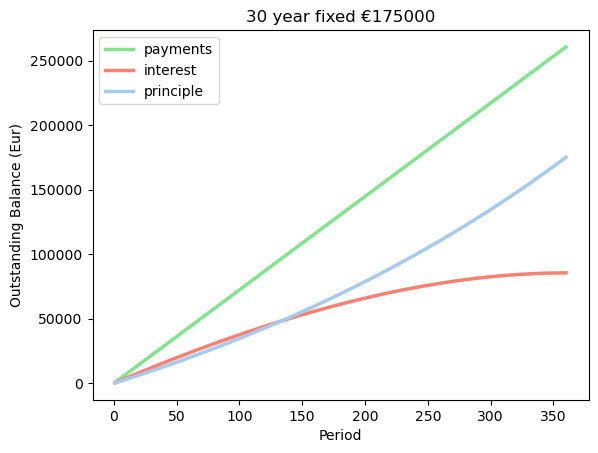

In [34]:
mortgage_plot(fix1)